In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, array_to_latex, plot_bloch_multivector, plot_state_qsphere
from math import pi
%matplotlib inline

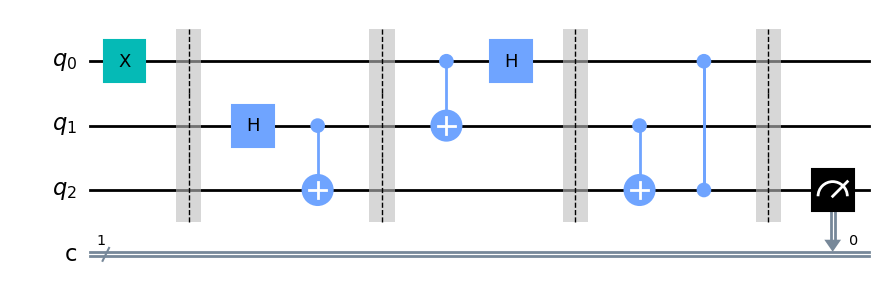

In [83]:
circuit = QuantumCircuit(3, 1)  # Circuit consisting of 3 qubits and 2 classical registers

# Initialize source qubit to teleport
circuit.x(0) # initialize source qubit to teleport - picking the pi/3 rotation, but could be other states
circuit.barrier()   # barrier to ensure rx gate applied fully

# Entangle control and destination qubits via Bell state pair
circuit.h(1)
circuit.cx(1, 2)
circuit.barrier()

# Perform Bell state measurement with control qubit as target
# and source qubit as control
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()

# Apply conditional operations with destination qubit as target
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.barrier()

circuit.measure(2,0)
circuit.draw(output='mpl')

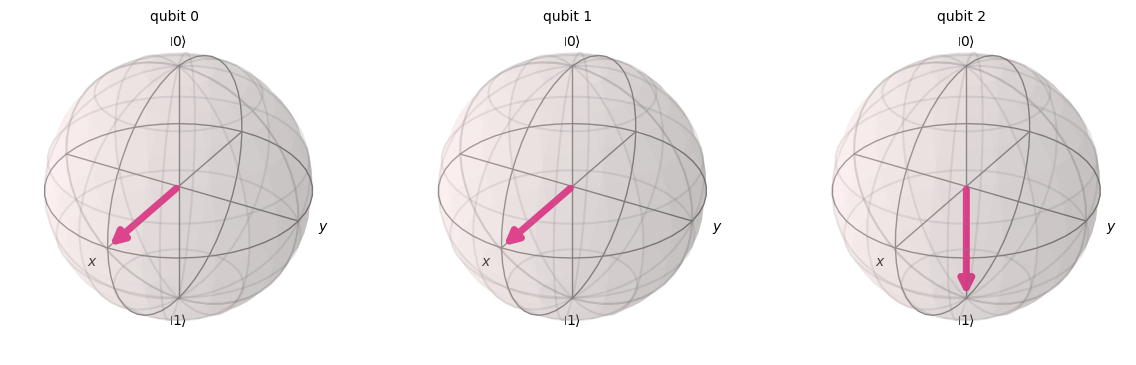

In [88]:
simulator = Aer.get_backend('statevector_simulator')
statevector = execute(circuit, backend=simulator).result().get_statevector()
plot_bloch_multivector(statevector)